In [4]:
from vm.mnemonic import WProtectMnemonic
from vm.analysis import PEAnalysis, WProtectEmulator, WProtectTracer
import vm.obfuscation
from vm.rule_generator import generate_rules
from semantic.flow import WProtectControlFlow, UnknownInstructionError, PositionInstructionError

In [5]:
center2 = WProtectEmulator("if_better/if.wp.exe")
center2.find()
center = center2.recover_mnemonics(center2.offset, WProtectMnemonic)[1]
WProtectMnemonic.consolidate_names(center)

[INFO]	PE loaded
[INFO]	reachable code analysis done


[INFO]	WProtect vm mnemonics found at offset 0x40a99c


[INFO]	Mnemonics loaded


Offset 0x40a1bc already contains
 {'instruction': <vm.mnemonic.WProtectMnemonic object at 0x7fe29c26d0d0>, 'params': [3], 'predecessors': 2, 'successors': [4235706]},
 provided {'instruction': 'd_push_reg', 'params': [3]}


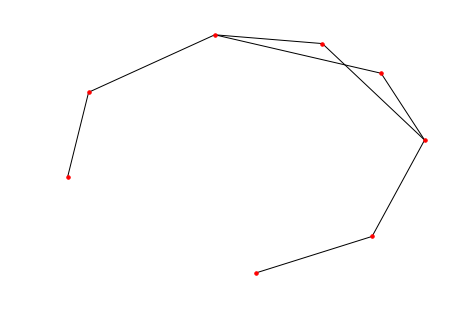

In [8]:
def printer(offset, instruction, args, off):
    t.add_node(offset, instruction, args, off)
    #print "%s\t%s\t%s" % (hex(offset), map(hex, off),instruction.name)

t = WProtectControlFlow(center)
instance = WProtectTracer(center2, center)

machine = [instance]
index = 0
while index < len(machine):
    try:
        tmp = machine[index].step(printer)
        machine += tmp
    except PositionInstructionError as err:
        print err
    index += 1

import networkx as nx
import matplotlib.pyplot as plt
    
nx.draw(t.get_simple_control_flow(), node_size=12)
plt.show()

In [9]:
out = {}
compiled = t.compile_blocks(out)

In [10]:
compiled.keys()

[4240010, 4235708, 4240429, 4240206L]